In [38]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [39]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


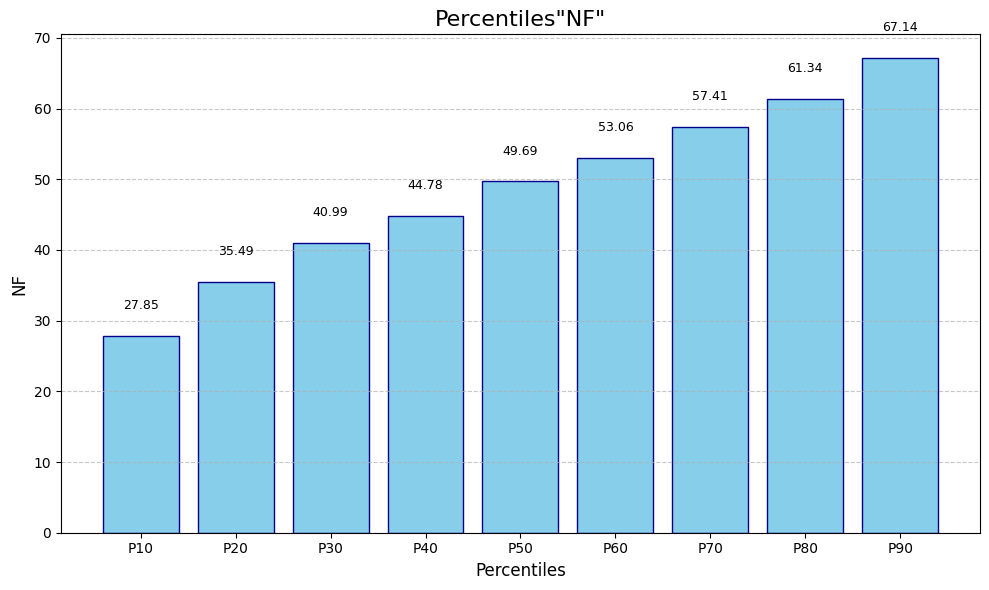

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

def percentiles2(archivo, columna='NF'):
    
        df = pd.read_csv(archivo)
        
        if columna not in df.columns:
            print(f"Error.")
            return None
        quantiles = np.arange(0.1, 1.0, 0.1) 
        
        percentil_valores = df[columna].quantile(quantiles)
        
        etiquetas_x = [f'P{int(q*100)}' for q in quantiles]
        
        valores_y = percentil_valores.values
        fig, ax = plt.subplots(figsize=(10, 6))
        barras = ax.bar(etiquetas_x, valores_y, color='skyblue', edgecolor='darkblue')
        ax.set_title(f'Percentiles"{columna}"', fontsize=16)
        ax.set_xlabel("Percentiles", fontsize=12)
        ax.set_ylabel(columna, fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        for bar in barras:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05 * max(valores_y), 
                    f'{yval:.2f}', ha='center', va='bottom', fontsize=9)
        plt.tight_layout()
        nombre_figura = 'Percentiles.png'
        plt.savefig(nombre_figura)
datos_ejemplo = {
    'NF': np.random.normal(loc=50, scale=15, size=500), 
    'OtraColumna': np.random.randint(1, 10, 500)
}
percentiles2(archivo='datos.csv', columna='NF')
plt.savefig("figuras/percentiles.png", dpi=300, bbox_inches="tight")